# Creating and analysing the simulated datasets #
Current code includes: 
Number of transcripts: each transcript has its own SNPs, each with their own error rate, and its own mobility status.

Number of SNPs: the number of SNPs per transcript (currently fixed).

Number of replicates: We create 2 homograft files (Nhom1 and Nhom2), and then no_reps heterograft files. 

# Method A #

If a single SNP has a read depth >= min_read_thresh, then it is flagged as being mobile. If 1 or more SNPs are flagged as being mobile, then the transcript is flagged as being mobile.

# Handling SNPs #

Bayes Factors: sum them all (should we point out in the paper that this is a useful advantage of this method?)

Method A: snp_thresh SNPs need to have reads mapping to the other ecotype, in order for a mobile classification to be given for the transcript

Method B: snp_thres SNPs need to have reads mapping to the other ecotype, in order for a mobile classification to be given for the transcript

# Handling replicates #

Bayes Factors: Again, very simple. We sum across replicates

Method A: A transcript needs to have been given a mobile assignment in rep_thresh replicates, in order for a final mobile assignment to be given.

Method B: A transcript needs to have been given a mobile assignment in rep_thresh replicates, in order for a final mobiel assigment to be given.

In [ ]:
## Code to run the simulations using the python package

import baymobil as baymob

## Running and evaluating the simulations
## Each simulation is designed to investigate the accuracy of the results as a function of some parameter. The values for this parameter must be defined in the "parameters.cfg" file

parameter_func = "N"

## Create the datasets. This function creates no_reps .csv files, storing them in the "output" folder. This will delete any previous files, so make sure you have moved anything that you still need.
baymob.simulations.create_simulated_data(parameter_func)

## Now, we load in and combine all of the replicate data, according to the above rules
df = baymob.load_data()

## Plot and compare the accuracy (TP + TN) / (TP + TN + FP + FN) of the three different methods on our simulated datasets
baymob.plot_data_all(df,parameter_func)


In [ ]:
## Code to run the local version of baymobil (for testing
# 
import baymobil.baymobil as baymob
import baymobil.simulations as sim

sim.create_simulated_data("N")

In [ ]:
## Code to run the test datasets
import pandas as pd
test_path = "test_data/"

#dfhom1 = pd.read_csv(test_path + "C-C-root-FN.csv")
#dfhom2 = pd.read_csv(test_path + "P-P-root-FN.csv")
#dfhet = pd.read_csv(test_path + "Col-FN-root-1.csv")

dfhom1_path = test_path + "C-C-root-FN.csv"
dfhom2_path = test_path + "P-P-root-FN.csv"
dfhet_path = test_path + "Col-FN-root-1.csv"

#dfhom1.columns = ["SNP","N","eco1","n"]
#dfhom2.columns = ["SNP","N","eco1","n"]
#dfhet.columns = ["SNP","N","eco1","n"]

import baymobil.baymobil as baymob

#df = baymob.run_bayes_analysis([dfhom1, dfhom2, dfhet])
baymob.run_bayes_analysis([dfhom1_path, dfhom2_path, dfhet_path])


In [ ]:
import baymobil.baymobil as baymob

baymob.run_bayes_analysis([1000,500,1000,500,1000,0])

In [ ]:
## Run our test examples: for these cases, only use one replicate for now. Need to think more about how to average across values.
import baymobil as baymob

%pwd  #look at the current work dir
%cd   "/Users/tomkinsm/baymobil/baymobil/test_sims/Example3_noisy_data_fixednhom/"

baymob.simulations.create_simulated_data("N2_func")
df = baymob.load_data()
baymob.plot_data_bf(df,"N2_func")

In [ ]:
import pandas as pd

files = ["plot_resultsN2_func_1SNP.csv","plot_resultsN2_func_2SNPs.csv","plot_resultsN2_func_4SNPs.csv","plot_resultsN2_func_6SNPs.csv","plot_resultsN2_func_8SNPs.csv","plot_resultsN2_func_10SNPs.csv"]
import matplotlib.pyplot as plt
snps = [1,2,4,6,8,10]
for f, snp in zip(files, snps):
    snp_string = str(snp)
    df = pd.read_csv(f)
    plt.plot(df.N2_func,df.bf,'x', label = snp_string)

plt.legend()
plt.xlabel("N2_func")
plt.ylabel("Accuracy")
plt.savefig("fixed_data_N2.png",dpi=300)
plt.show()



In [ ]:
df[df["N2_func"]==15][["N2","N2_func","q","N"]]


In [ ]:
df.iloc[309]
N = 735
n = 40
Nhom1 = 113
nhom1 = 1
Nhom2 = 445
nhom2 = 1

baymob.run_bayes_analysis([Nhom1, nhom1, Nhom2, nhom2, N, n],1)

In [ ]:
import numpy as np
def safebeta(N,n, alpha,beta):
    facterm = 1.0
    if alpha>1:
        a = np.arange(1, alpha)
        facterm = np.prod((n+a)/(N+a))
    if beta > 1.0:
        a = np.arange(1, beta)
        facterm = facterm * np.prod((N-n+a)/(N+alpha+a))
    return facterm / (N+alpha)

safebeta(1000,900,1000,900)

In [ ]:
## Redo the competition plots, checking that the values are adequately represented

## What are the relevant read depths and error rates?

## Are we ensuring that we have added reads for each mobile SNP?

## How many SNPs should we sum over? Different plots for different numbers of SNPs?

import baymobil.simulations as sim

sim.create_simulated_data("N")




In [2]:
import pandas as pd
df = pd.read_csv("SNP_wise_values.csv")
df = df[df["N"]!=1500]
## Group by transcript
print(df)

df_transcript = df.groupby(["transcript","N","q"]).sum().reset_index()
print(df_transcript)

## Calculate TP, TN, FP, FN
df_transcript["TP"] = 0
df_transcript["TN"] = 0
df_transcript["FP"] = 0
df_transcript["FN"] = 0

df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.log10BF>=1),"TP"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.log10BF<1),"TN"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.log10BF>=1),"FP"] = 1
df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.log10BF<1),"FN"] = 1

print(df_transcript)

final_results = df_transcript.groupby(["N","q"]).sum()[["TP","TN","FP","FN"]].reset_index()

print(final_results)



           N      q  N2_func  mobile     n  variance       std   N2       SNP  \
0        100  0.001      5.0   False   0.0    0.0999  0.316070  0.0     0_0_0   
1        100  0.002      5.0   False   0.0    0.1996  0.446766  0.0     0_0_1   
2        100  0.003      5.0   False   0.0    0.2991  0.546900  0.0     0_0_2   
3        100  0.004      5.0   False   1.0    0.3984  0.631189  0.0     0_0_3   
4        100  0.005      5.0   False   1.0    0.4975  0.705337  0.0     0_0_4   
...      ...    ...      ...     ...   ...       ...       ...  ...       ...   
299995  1000  0.006     15.0   False   2.0    5.9640  2.442130  0.0  999_2_95   
299996  1000  0.007     15.0   False   8.0    6.9510  2.636475  0.0  999_2_96   
299997  1000  0.008     15.0   False   8.0    7.9360  2.817091  0.0  999_2_97   
299998  1000  0.009     15.0   False   8.0    8.9190  2.986469  0.0  999_2_98   
299999  1000  0.010     20.0   False  14.0    9.9000  3.146427  0.0  999_2_99   

        Nhom1  Nhom2  nhom1

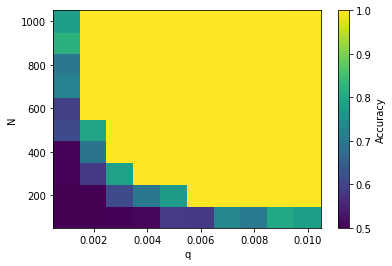

In [3]:
import matplotlib.pyplot as plt
import numpy as np


final_results["accuracy"] = (final_results["TP"] + final_results["TN"]) / (final_results["TP"] + final_results["TN"] + final_results["FP"] + final_results["FN"])

#print(final_results)

x = final_results["q"].to_numpy()
y = final_results["N"].to_numpy()
z = final_results["accuracy"].to_numpy()


## Need to get length of axes
## Need to have same number of values for each parameter or this will fail!
qs = len(set(df["q"].to_list()))
Ns = len(set(df["N"].to_list()))

x = np.reshape(x, [qs, Ns])
y = np.reshape(y, [qs, Ns])
z = np.reshape(z, [qs, Ns])

plt.pcolor(x,y,z,shading='auto')
plt.colorbar(label="Accuracy")
plt.xlabel("q")
plt.ylabel("N")
#plt.savefig(path_to_output + "N_vs_q_bayes_accuracy.png",dpi=300)
plt.show()


## pie chart plot???

## Snps with errors need to be removed from all replicates????
## Difference between SNP filtering and single instance filtering???

In [ ]:
x = np.arange(0.001, 0.01, 0.001)
y = np.arange(100,1000,100)

print(x)
print(y)

In [ ]:
print(np.ceil(x*100 * 5))
print(np.ceil(x*200* 5))

## For all values of q, only 1 read is added to the mobile SNPs

print(np.ceil(y * 0.001 * 5))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

q = 0.01
mean = 100;  variance = mean * q * (1 - q)
std = np.sqrt(variance)
print(std)
#x-axis ranges from -3 and 3 with .001 steps
x = np.arange(96, 104, 0.01)
#plot normal distribution with mean 0 and standard deviation 1
plt.plot(x, norm.pdf(x, 100, std), label="q = 0.01")
q = 0.001
mean = 100;  variance = mean * q * (1 - q)
std = np.sqrt(variance)
print(std)
plt.plot(x, norm.pdf(x, 100, std), label="q = 0.001")
plt.legend()
plt.savefig("dists_.png")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pie(x, ax):

    tp = float(x["TP"])
    tn = float(x["TN"]) 
    fp = float(x["FP"]) 
    fn = float(x["FN"]) 

    total = tp + tn + fp + fn
    
    tp = tp / total
    tn = tn / total
    fp = fp / total
    fn = fn / total

    n = float(x["N"])
    q = float(x["q"])

    ax.pie([tp,tn,fp,fn], center = ([n, q]), radius = 1, colors=['b','g','r','y'], normalize = True)

fig, ax = plt.subplots(1,1)
ax.scatter(x=final_results['N'], y=final_results['q'], s=0)
# git min/max values for the axes
y_init = ax.get_ylim()
x_init = ax.get_xlim()
print(y_init)
print(x_init)
final_results.apply(lambda x: plot_pie(x,ax), axis=1)
_ = ax.yaxis.set_ticks(np.arange(0,y_init[1], 0.001))
_ = ax.xaxis.set_ticks(np.arange(0, round(x_init[1]), 100))
ax.set_aspect('equal', 'box')
plt.show()

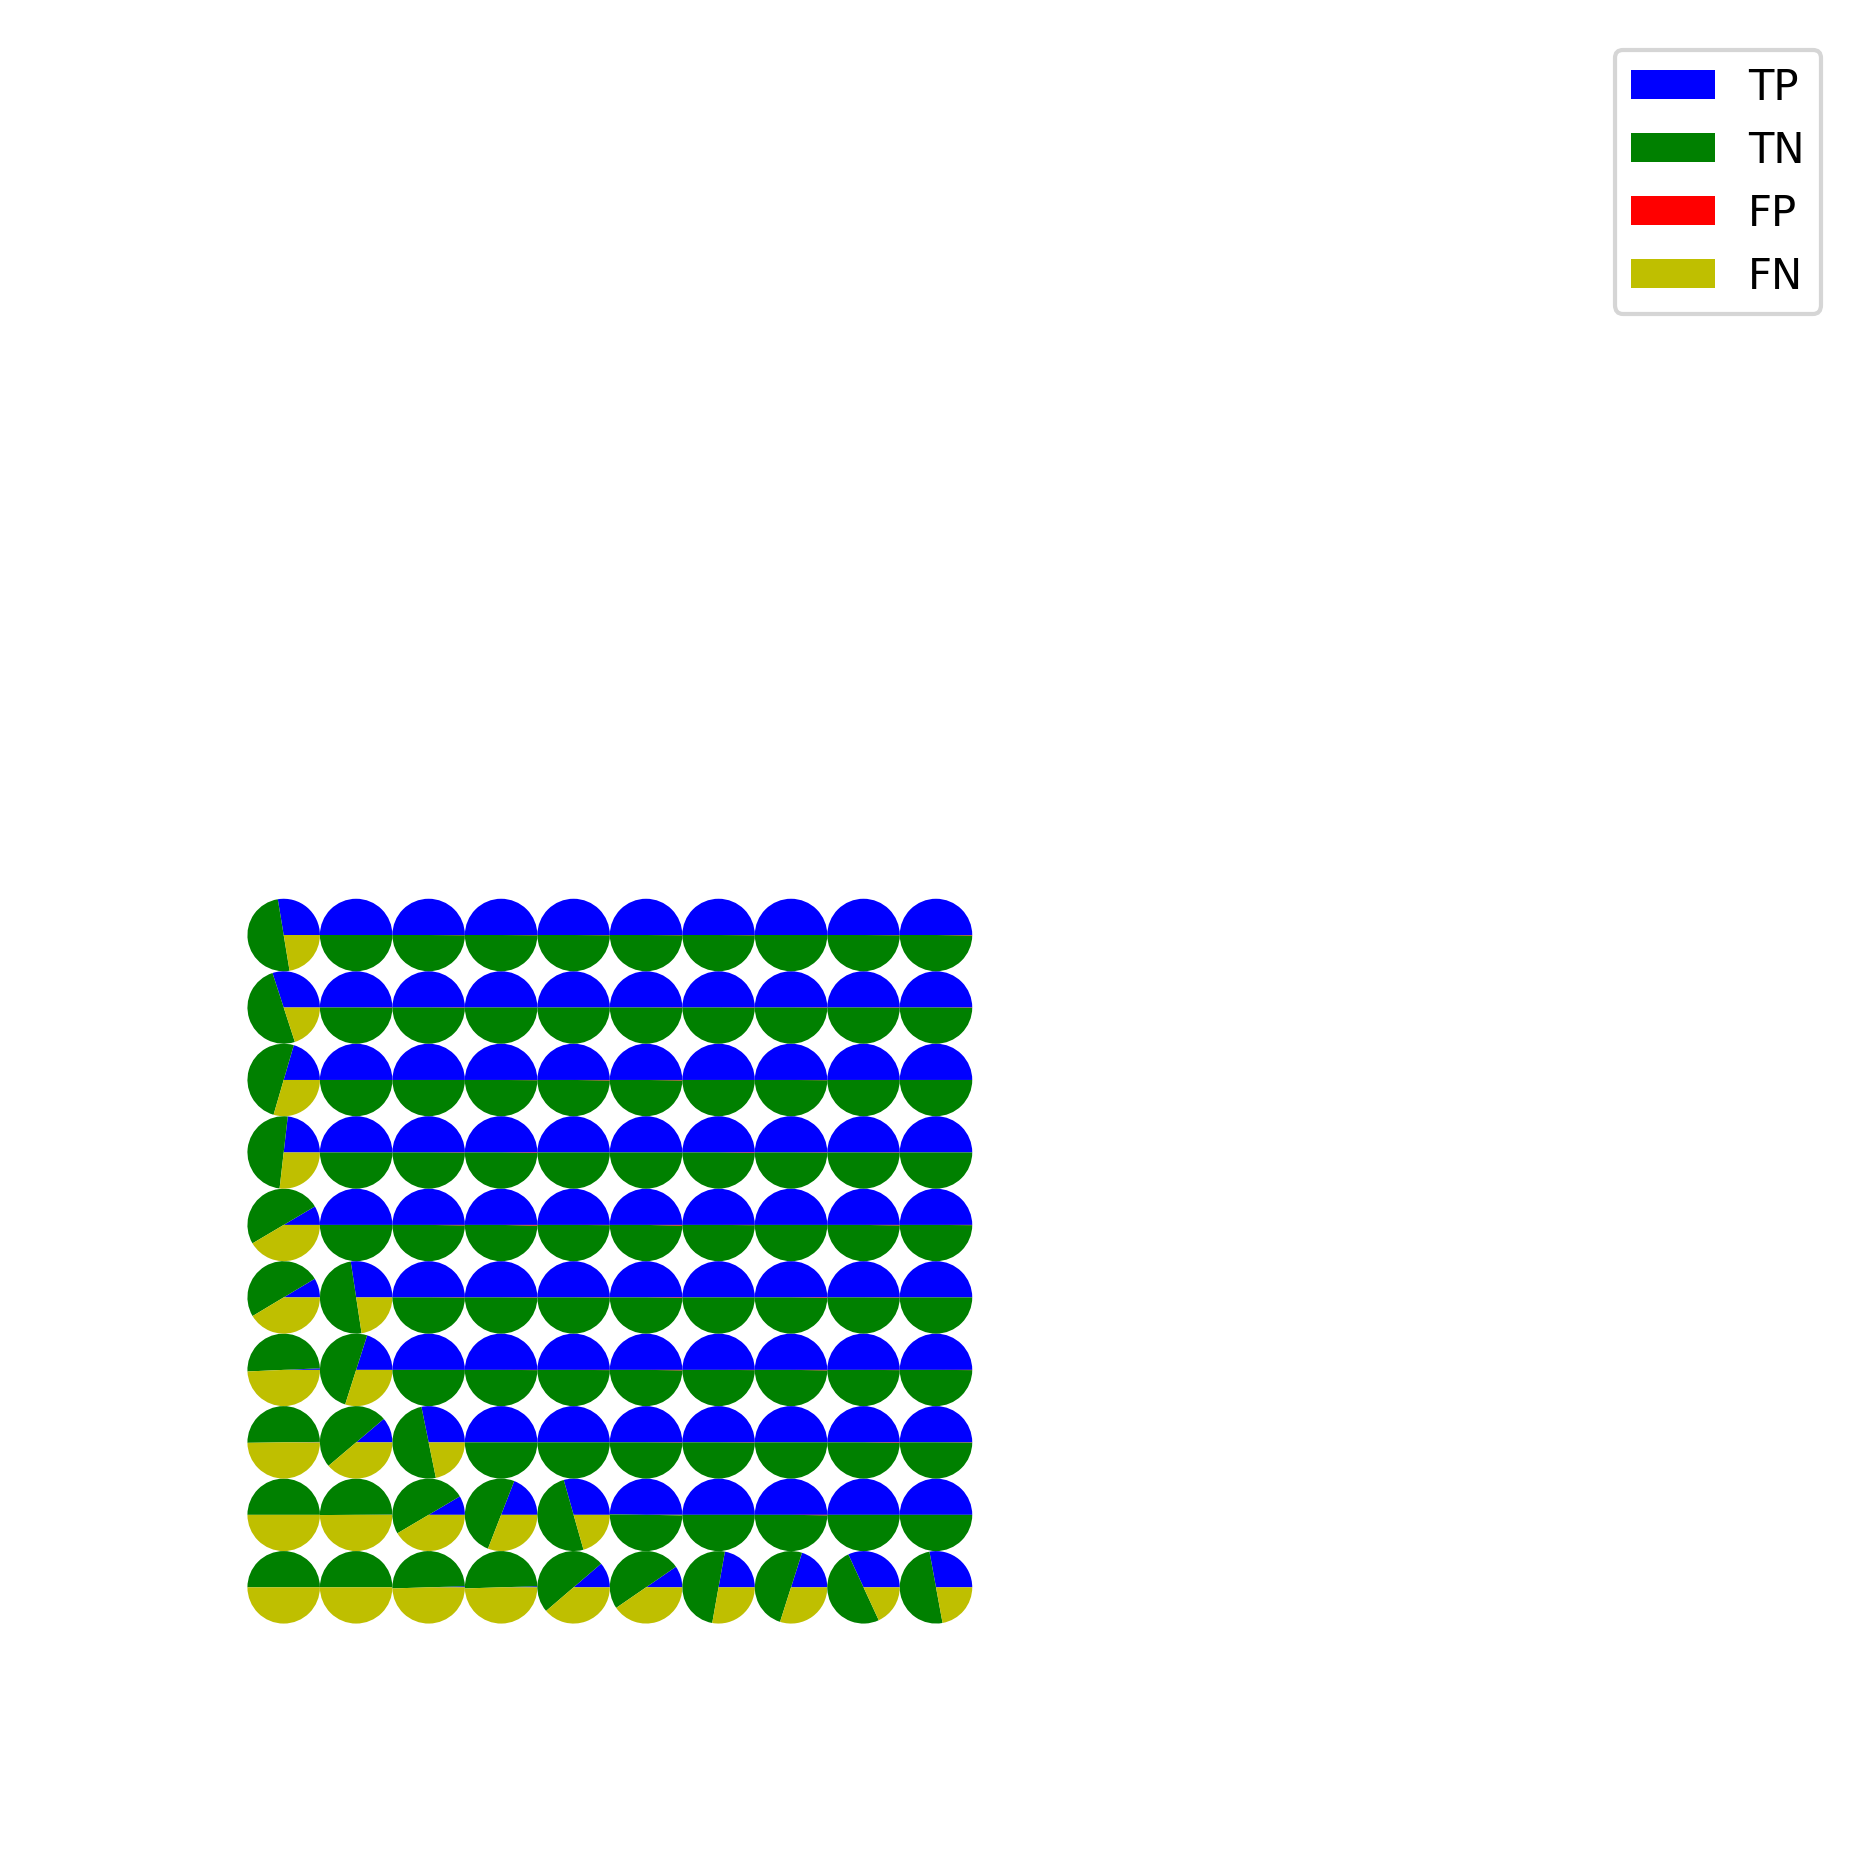

In [60]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pie(x, ax):

    tp = float(x["TP"])
    tn = float(x["TN"]) 
    fp = float(x["FP"]) 
    fn = float(x["FN"]) 

    n = float(x["N"]) 
    q = float(x["q"]) 

    ax.pie([tp,tn,fp,fn], center = ([n, q]), radius = 1, colors=['b','g','r','y'], normalize = True)

fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi=300)

test = final_results.copy()
test["N"] = test["N"] / test["N"].max()
test["q"] = test["q"] / test["q"].max()
test.apply(lambda x: plot_pie(x,ax), axis=1)
plt.savefig("pie_test.png")
x_ticks = np.arange(100,1000,100)
y_ticks = np.arange(0.001,0.01,0.001)
#plt.xticks(x_ticks)
#plt.yticks(y_ticks)
plt.legend(['TP', 'TN','FP','FN'])
plt.show()

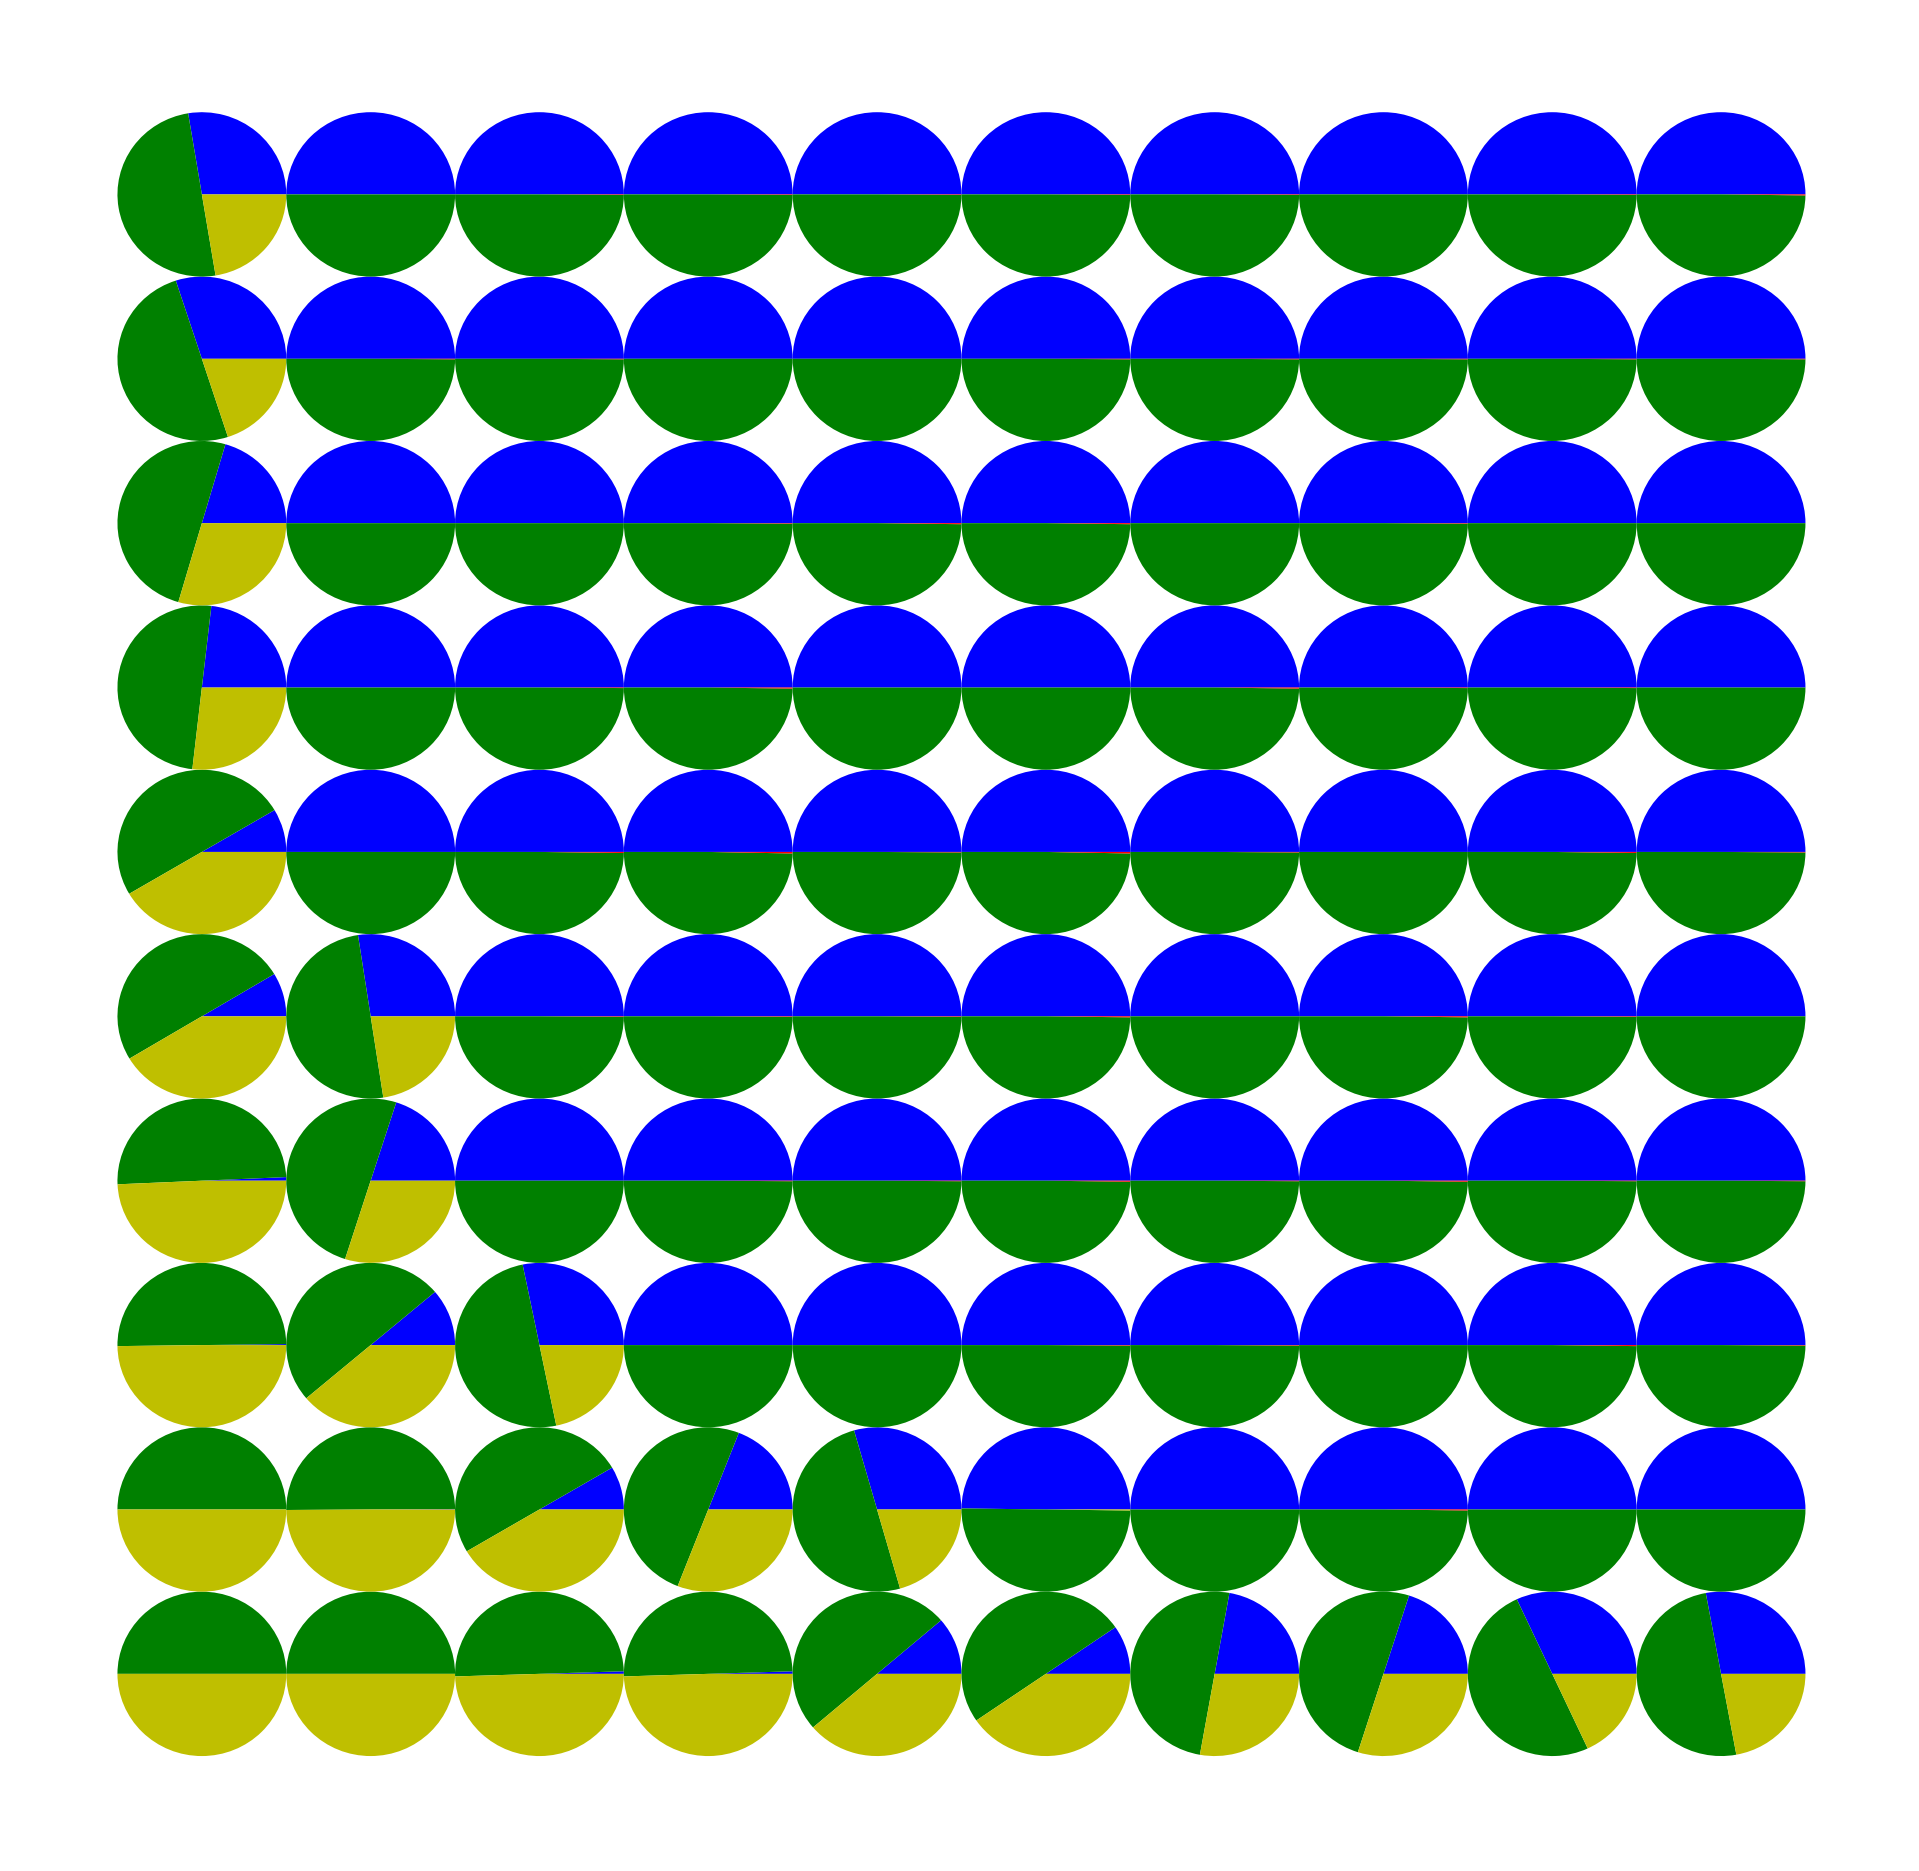

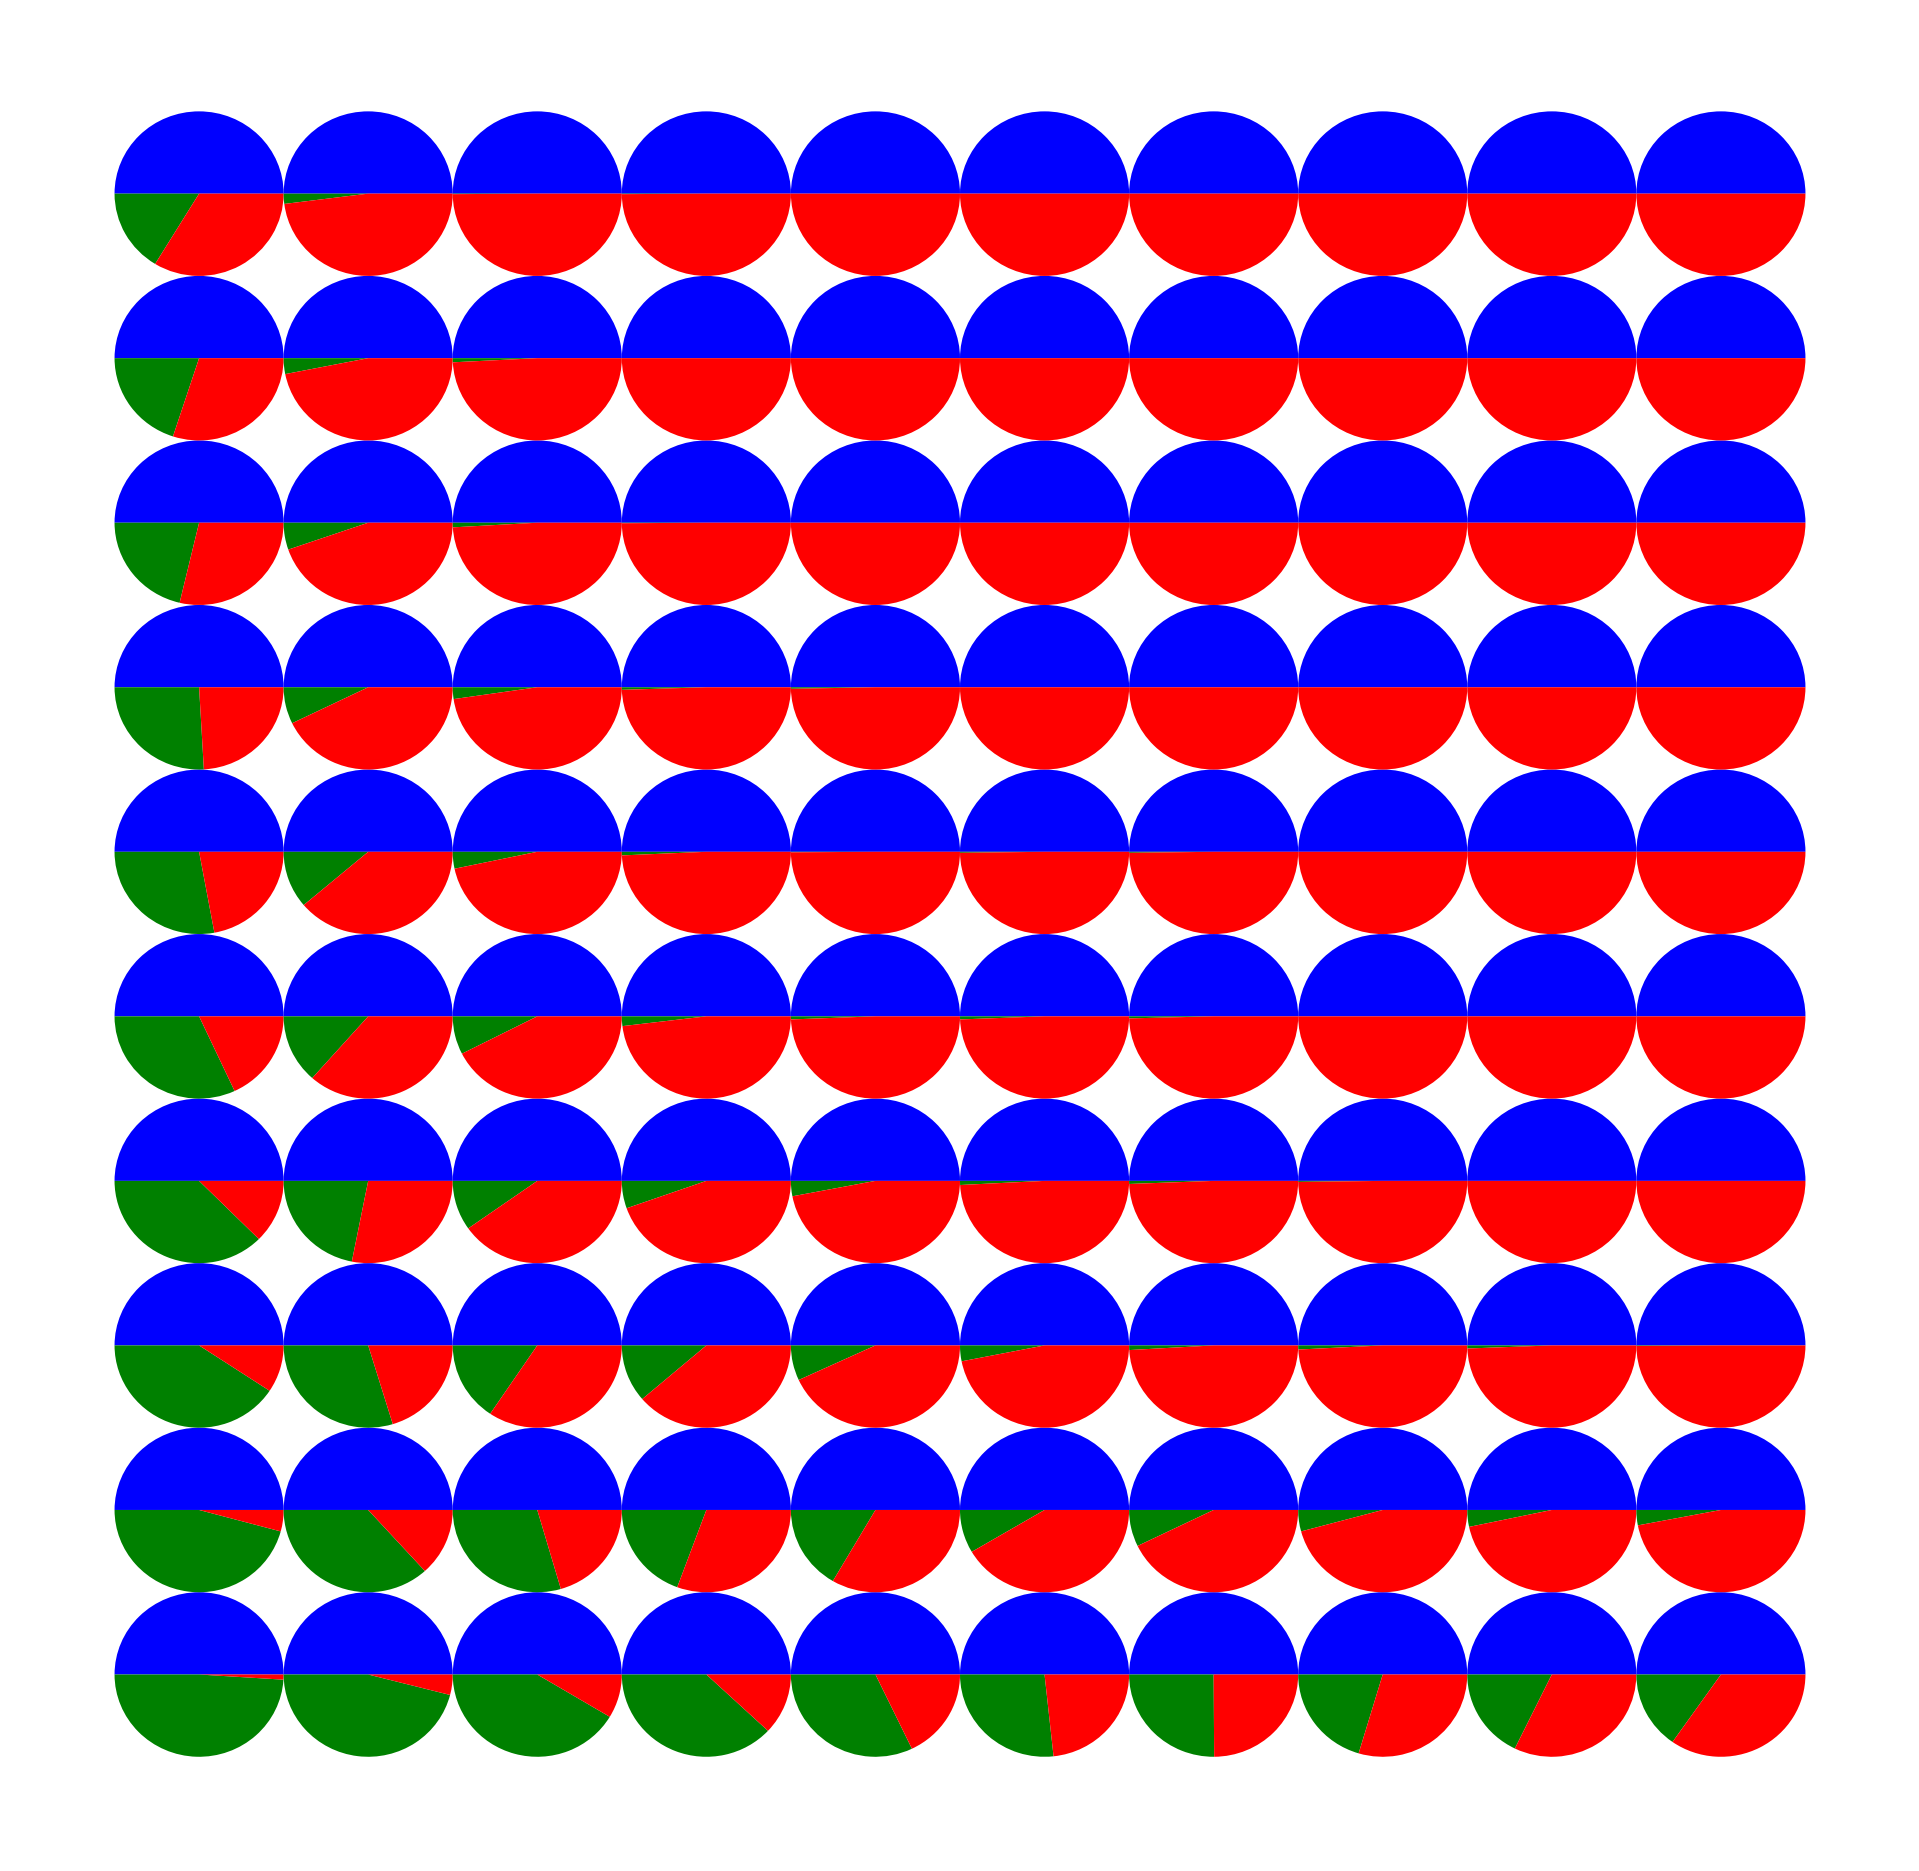

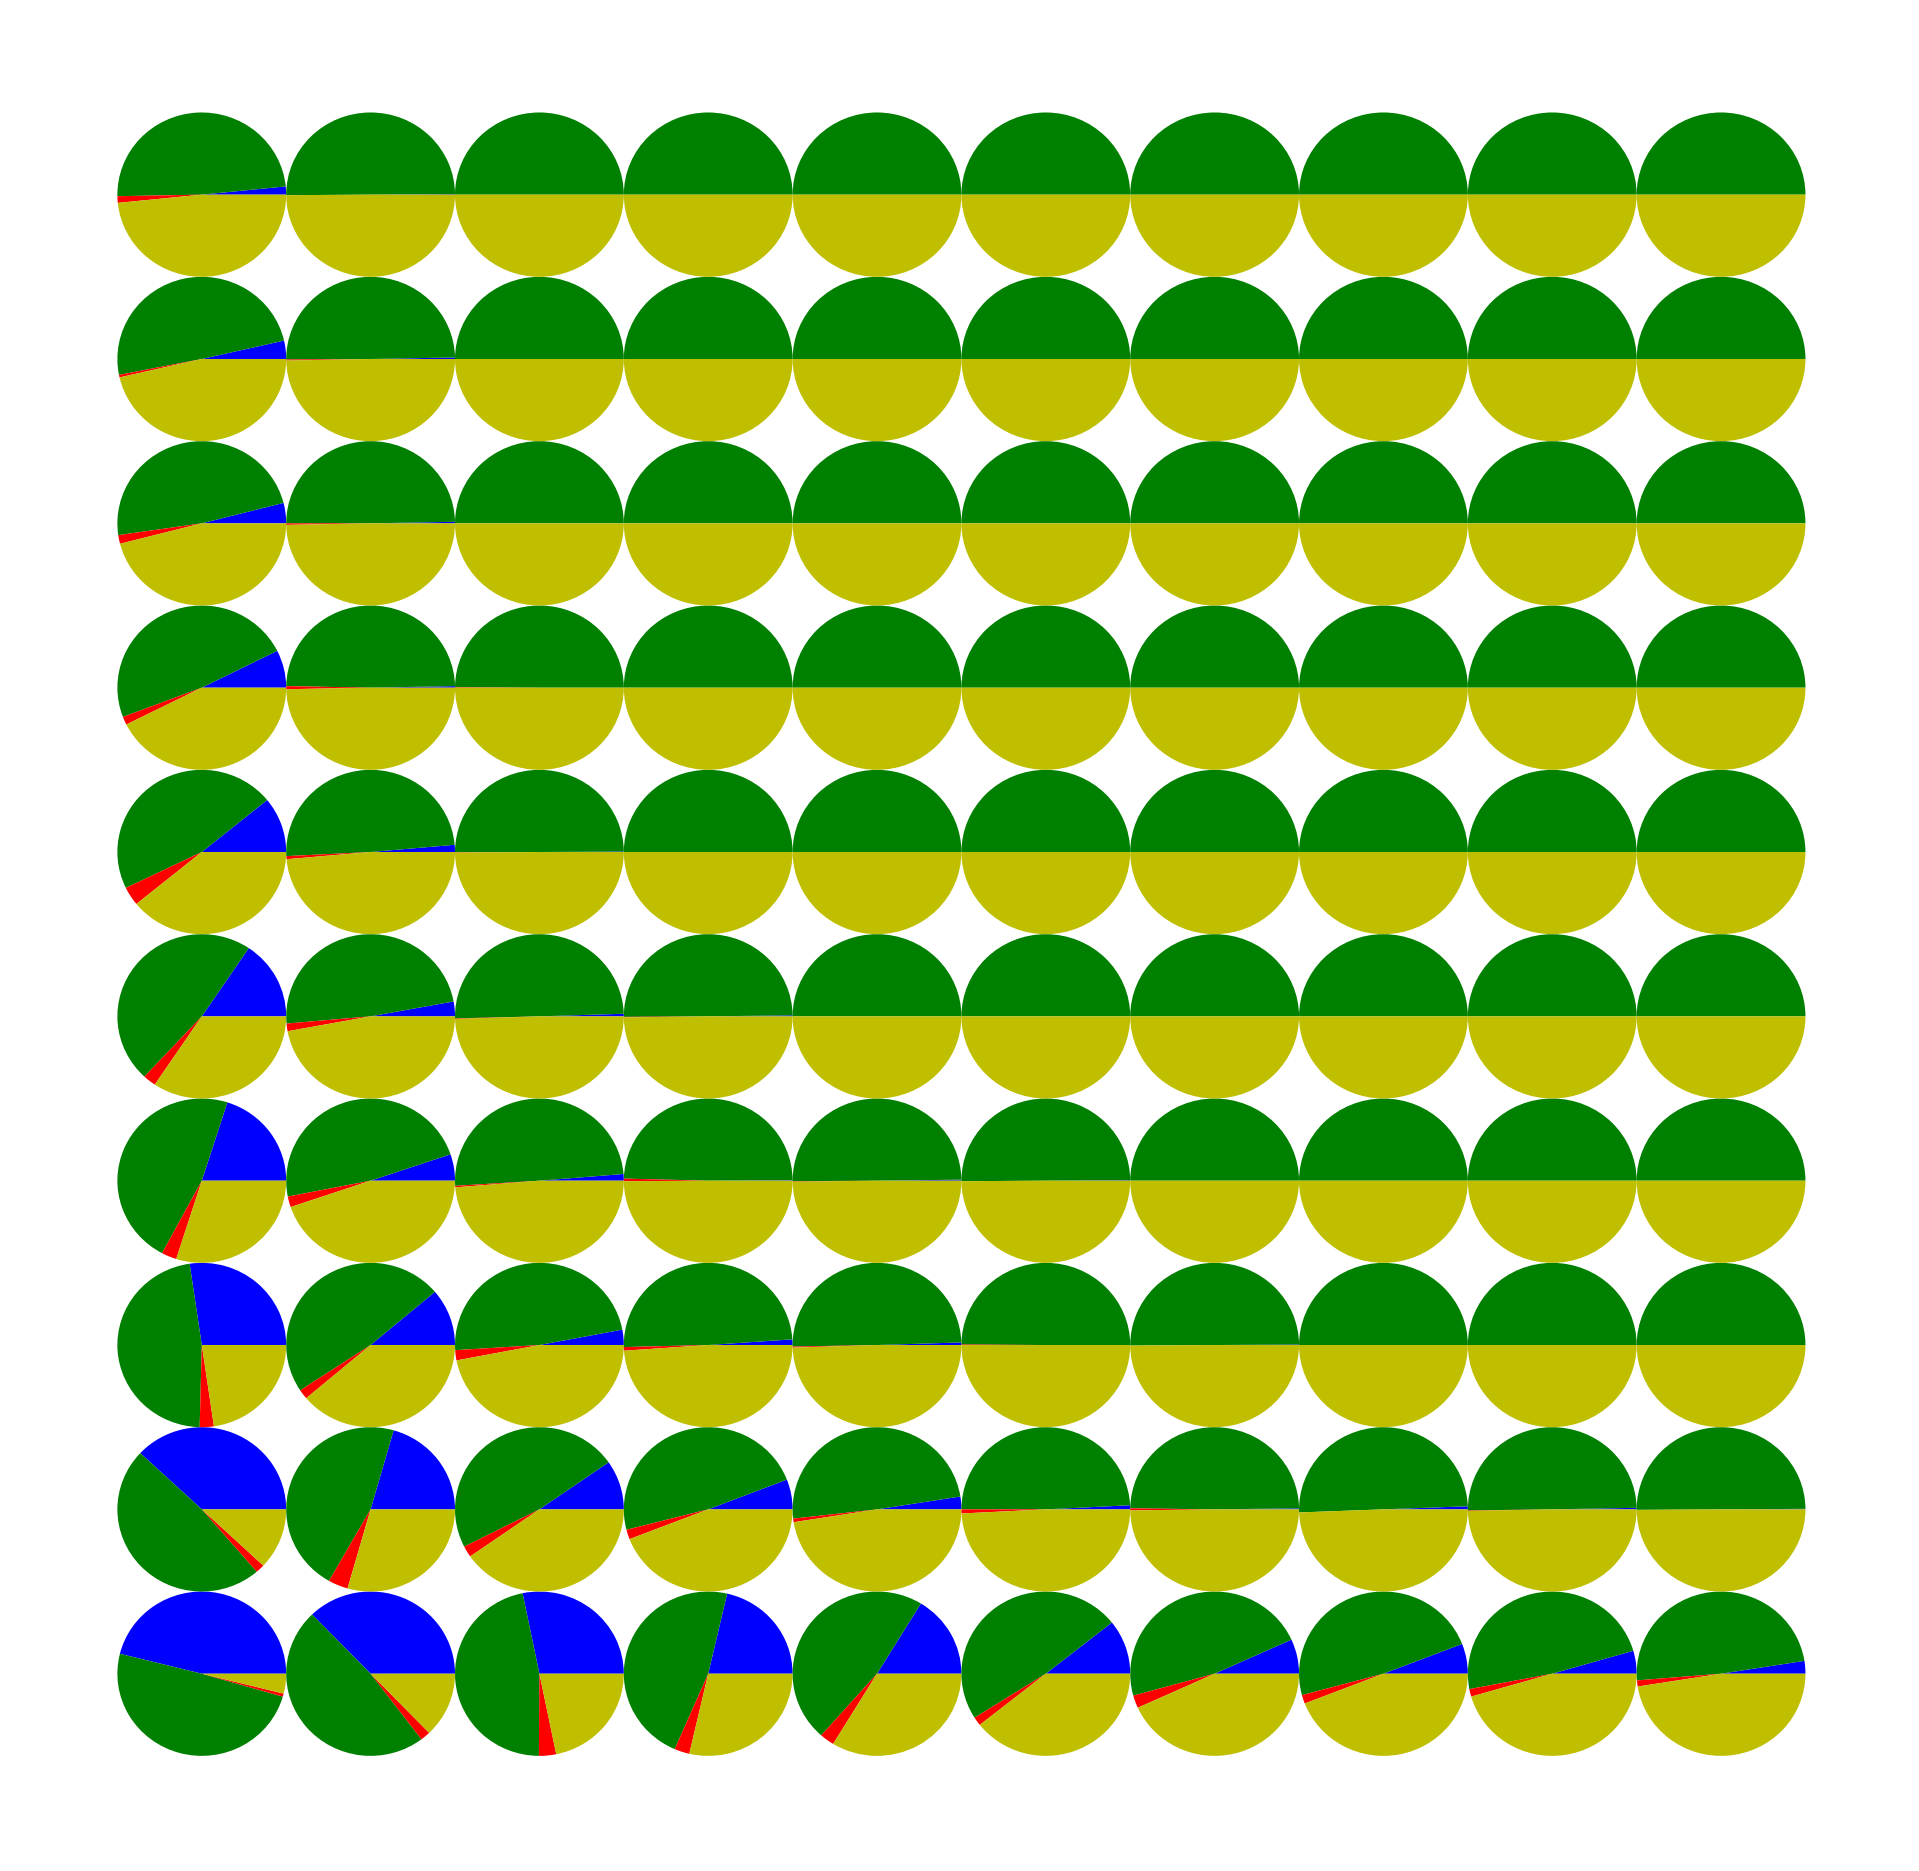

In [116]:
## Create the figures separately and then add in the axes later

import matplotlib

def plot_pie(x, ax):

    tp = float(x["TP"])
    tn = float(x["TN"]) 
    fp = float(x["FP"]) 
    fn = float(x["FN"]) 

    total = tp + tn + fp + fn
    
    tp = tp / total
    tn = tn / total
    fp = fp / total
    fn = fn / total

    n = float(x["N"])
    q = float(x["q"])

    ax.pie([tp,tn,fp,fn], center = ([n, q]), radius = 0.05, colors=['b','g','r','y'], normalize = True)

matplotlib.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi=300)
fig.patch.set_facecolor('white')

## Bayes factors
df_transcript = df.groupby(["transcript","N","q"]).sum().reset_index()

## Calculate TP, TN, FP, FN
df_transcript["TP"] = 0
df_transcript["TN"] = 0
df_transcript["FP"] = 0
df_transcript["FN"] = 0

df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.log10BF>=1),"TP"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.log10BF<1),"TN"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.log10BF>=1),"FP"] = 1
df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.log10BF<1),"FN"] = 1

final_results = df_transcript.groupby(["N","q"]).sum()[["TP","TN","FP","FN"]].reset_index()
test = final_results.copy()
test["N"] = test["N"] / test["N"].max()
test["q"] = test["q"] / test["q"].max()
test.apply(lambda x: plot_pie(x,ax), axis=1)
x_ticks = np.arange(100,1000,100)
y_ticks = np.arange(0.001,0.01,0.001)
#plt.xticks(x_ticks)
#plt.yticks(y_ticks)
#plt.legend(['TP', 'TN','FP','FN'])
ax.axis('tight')

plt.savefig("bayes_pie.svg",dpi=300)
plt.show()


## Same plot for Method A
fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi=300)
fig.patch.set_facecolor('white')

snp_thresh = 2
df_transcript = df.groupby(["transcript","N","q"]).sum().reset_index()
## Calculate TP, TN, FP, FN
df_transcript["TP"] = 0
df_transcript["TN"] = 0
df_transcript["FP"] = 0
df_transcript["FN"] = 0

df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.Method_A>=snp_thresh),"TP"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.Method_A<snp_thresh),"TN"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.Method_A>=snp_thresh),"FP"] = 1
df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.Method_A<snp_thresh),"FN"] = 1

final_results = df_transcript.groupby(["N","q"]).sum()[["TP","TN","FP","FN"]].reset_index()
test = final_results.copy()
test["N"] = test["N"] / test["N"].max()
test["q"] = test["q"] / test["q"].max()
test.apply(lambda x: plot_pie(x,ax), axis=1)
x_ticks = np.arange(100,1000,100)
y_ticks = np.arange(0.001,0.01,0.001)
#plt.xticks(x_ticks)
#plt.yticks(y_ticks)
#plt.legend(['TP', 'TN','FP','FN'])
#ax.set_title("Method A")
ax.axis('tight')
plt.savefig("methoda_pie.svg",dpi=300)
plt.show()

## Same plot for Method B
fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi=300)
fig.patch.set_facecolor('white')
df_transcript = df.groupby(["transcript","N","q"]).sum().reset_index()

## Calculate TP, TN, FP, FN
df_transcript["TP"] = 0
df_transcript["TN"] = 0
df_transcript["FP"] = 0
df_transcript["FN"] = 0

df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.Method_B>=snp_thresh),"TP"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.Method_B<snp_thresh),"TN"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.Method_B>=snp_thresh),"FP"] = 1
df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.Method_B<snp_thresh),"FN"] = 1

final_results = df_transcript.groupby(["N","q"]).sum()[["TP","TN","FP","FN"]].reset_index()

test = final_results.copy()
test["N"] = test["N"] / test["N"].max()
test["q"] = test["q"] / test["q"].max()
test.apply(lambda x: plot_pie(x,ax), axis=1)
#plt.legend(['TP', 'TN','FP','FN'])
##ax.set_title("Method B")
ax.axis('tight')
plt.savefig("methodb_pie.svg",dpi=300)
plt.show()


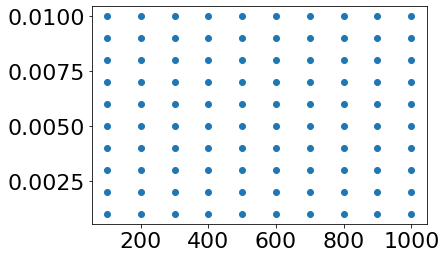

In [117]:
plt.scatter(final_results["N"],final_results["q"])
plt.show()